In [39]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# read dari link URL
url = 'https://raw.githubusercontent.com/alexchandra19/Proyek-ML-2023/main/Proyek%20ML/water_potability.csv?token=GHSAT0AAAAAACI6ZVESAY2ENQ6X6PXBFO6IZJOS4VQ'
data = pd.read_csv(url)
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.000000,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,0.000000,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,0.000000,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,0.000000,392.449580,19.903225,0.000000,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,0.000000,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,0.000000,402.883113,11.168946,77.488213,4.708658,1


Data Cleaning & Preprocessing

In [3]:
# replace missing values with 0
data.fillna(0, inplace=True)
# Step 3: Save the updated DataFrame back to the same file
data.to_csv(url, index=False)  # Set index to False to avoid writing the index column

In [4]:
# print pesan jika dataset file sudah di update untuk missing values replaced by 0
print("Dataset file updated with missing values replaced by 0.")

Dataset file updated with missing values replaced by 0.


In [5]:
# print dataset yang telah diupdate
print(data)

            ph    Hardness        Solids  Chloramines     Sulfate  \
0     0.000000  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246    0.000000   
2     8.099124  224.236259  19909.541732     9.275884    0.000000   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362    0.000000   
3273  9.419510  175.762646  33155.578218     7.350233    0.000000   
3274  5.126763  230.603758  11983.869376     6.303357    0.000000   
3275  7.874671  195.102299  17404.177061     7.509306    0.000000   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.88535

In [6]:
# cek tipe data
data_types = data.dtypes
print(data_types)

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object


In [7]:
# remove duplicate
data = data.drop_duplicates()

Visualize Outlier with Box Plot

<Axes: >

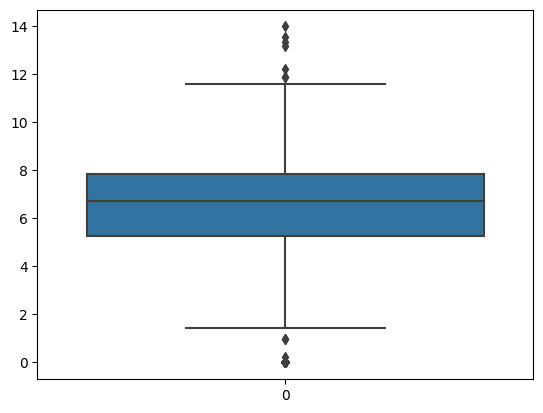

In [8]:
import seaborn as sns

# ph box plot
sns.boxplot(data['ph'])

<Axes: >

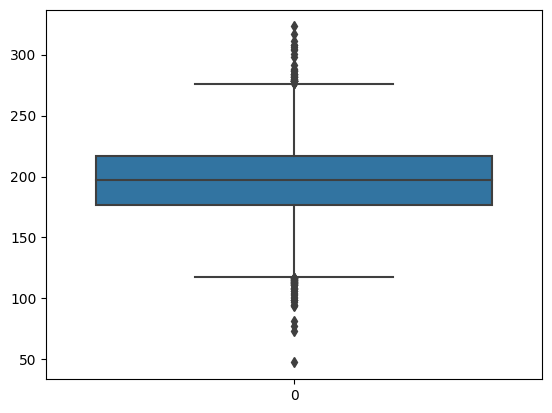

In [9]:
# hardness box plot
sns.boxplot(data['Hardness'])

<Axes: >

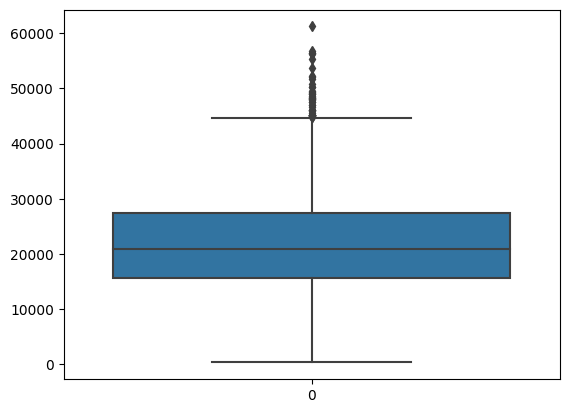

In [10]:
# hardness box plot
sns.boxplot(data['Solids'])

<Axes: >

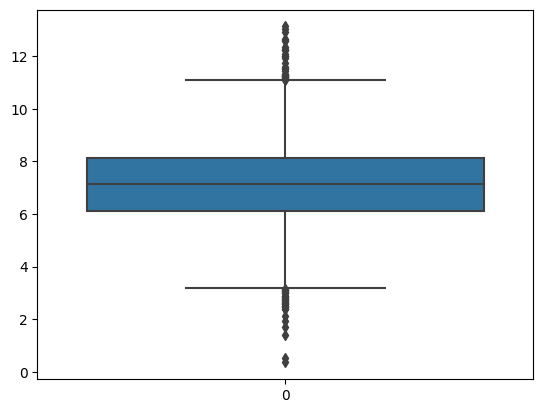

In [11]:
# Chloramines box plot
sns.boxplot(data['Chloramines'])

<Axes: >

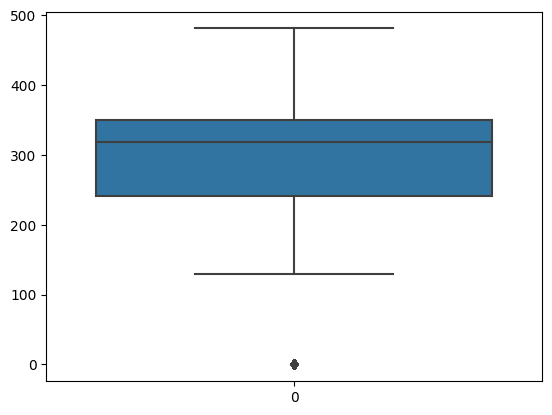

In [12]:
# Sulfate box plot
sns.boxplot(data['Sulfate'])

<Axes: >

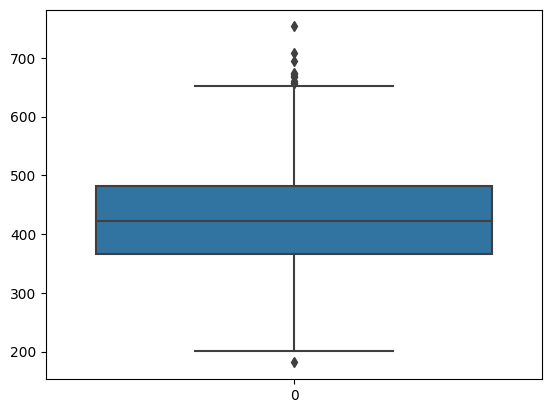

In [13]:
# Conductivity box plot
sns.boxplot(data['Conductivity'])

<Axes: >

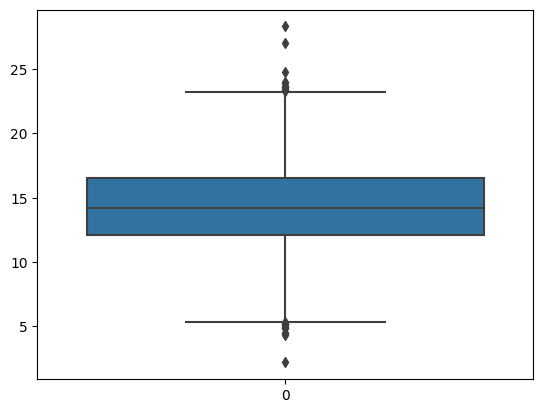

In [14]:
# Organic_carbon box plot
sns.boxplot(data['Organic_carbon'])

<Axes: >

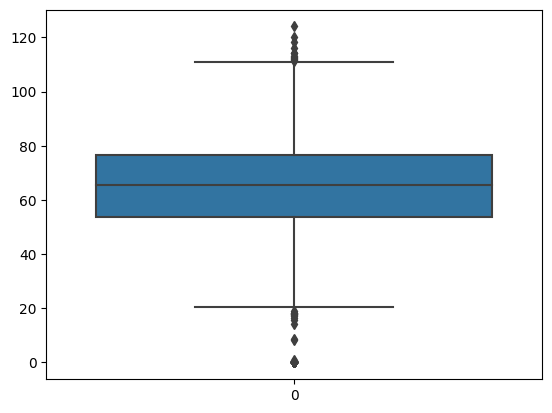

In [15]:
# Trihalomethanes box plot
sns.boxplot(data['Trihalomethanes'])

<Axes: >

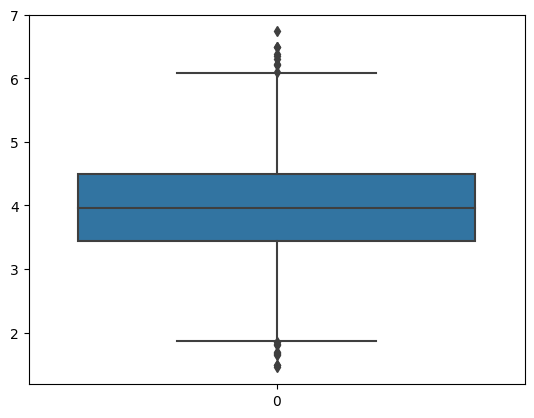

In [16]:
# Turbidity box plot
sns.boxplot(data['Turbidity'])

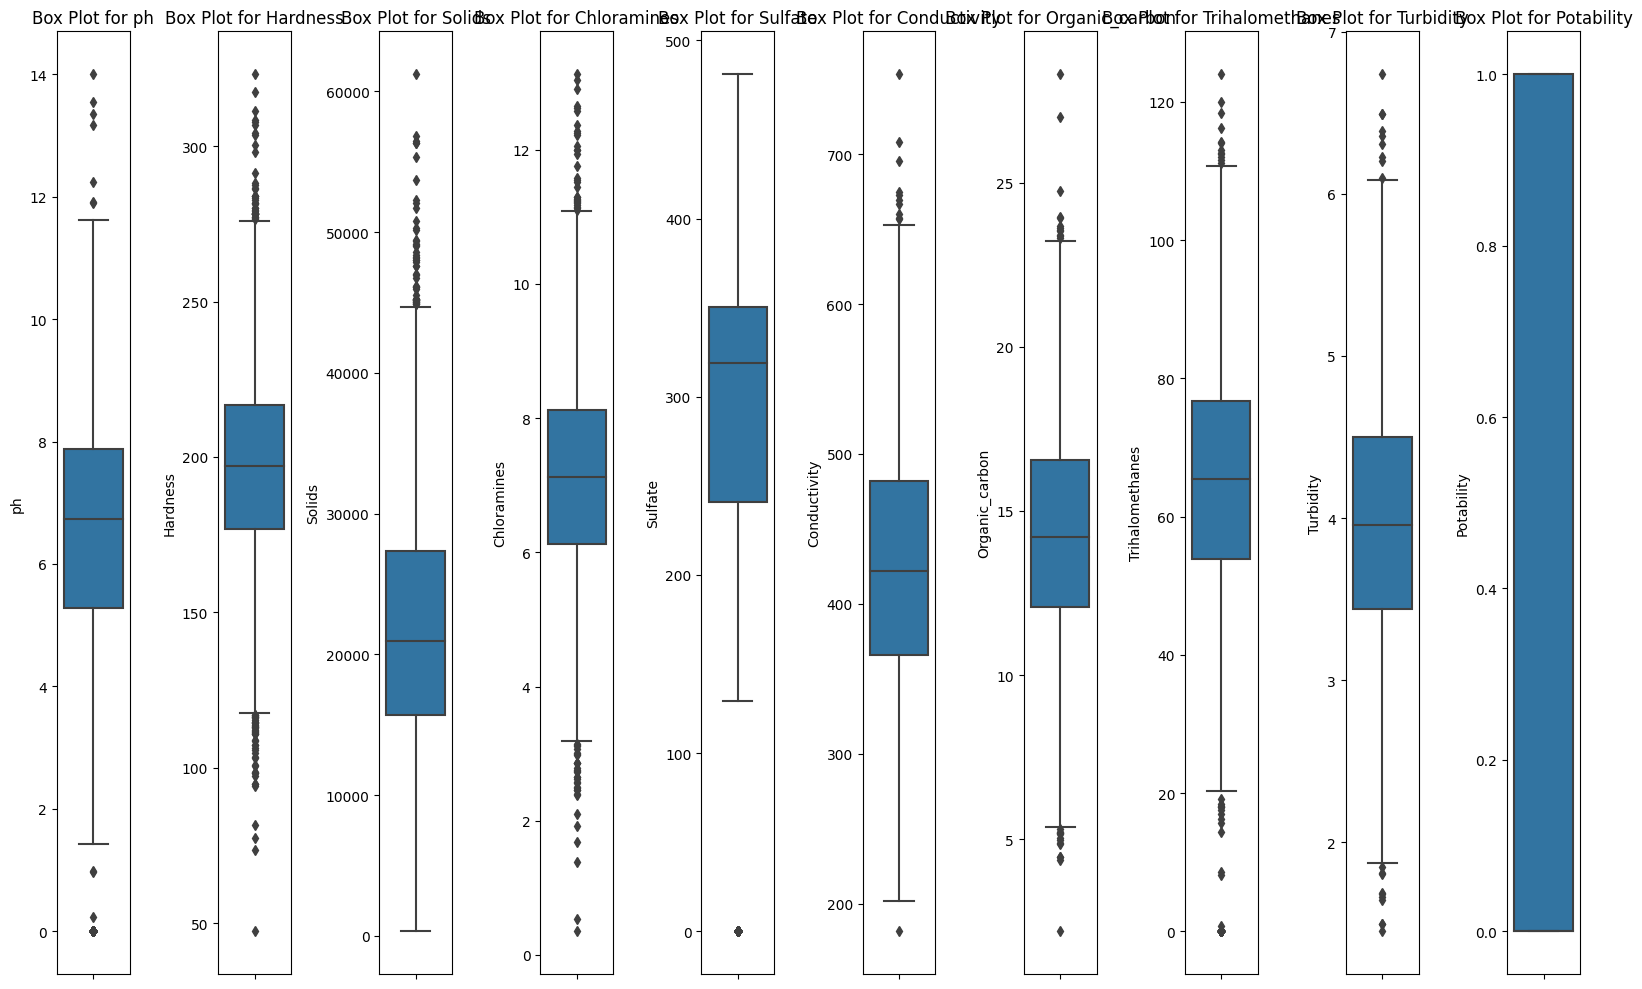

In [17]:
# Create box plots for each column
plt.figure(figsize=(16, 10))  # Adjust the figure size as needed

# Loop through each column and create a box plot
for column in data.columns:
    plt.subplot(1, len(data.columns), data.columns.get_loc(column) + 1)
    sns.boxplot(y=data[column])
    plt.title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()

IQR (Inter Quartile Range) 

In [18]:
# data yg lama
print("Old Shape: ", data.shape)

Old Shape:  (3276, 10)


In [31]:
# Calculate the upper and lower limits
Q1 = data['ph'].quantile(0.25)
Q3 = data['ph'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
print(lower,upper)

1.406746738979483 11.732979254615255


In [32]:
data = data[data['ph']<upper]

# Print the new shape of the DataFrame
print("New Shape: ", data.shape)

New Shape:  (3196, 10)


In [33]:
# Calculate the upper and lower limits
Q1 = data['Hardness'].quantile(0.25)
Q3 = data['Hardness'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
print(lower,upper)

117.71279516398762 276.0109470817283


In [34]:
data = data[data['Hardness']<upper]

# Print the new shape of the DataFrame
print("New Shape: ", data.shape)

New Shape:  (3160, 10)


In [35]:
# Calculate the upper and lower limits
Q1 = data['Solids'].quantile(0.25)
Q3 = data['Solids'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
print(lower,upper)

-1853.8420327170552 44877.49103963186


In [36]:
data = data[data['Solids']<upper]

# Print the new shape of the DataFrame
print("New Shape: ", data.shape)

New Shape:  (3118, 10)


In [19]:
# Calculate the upper and lower limits
Q1 = data['Chloramines'].quantile(0.25)
Q3 = data['Chloramines'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print(lower,upper)

3.1462213405647073 11.09608644703562


In [20]:
data = data[data['Chloramines']<upper]

# Print the new shape of the DataFrame
print("New Shape: ", data.shape)

New Shape:  (3246, 10)


In [21]:
# Calculate the upper and lower limits
Q1 = data['Conductivity'].quantile(0.25)
Q3 = data['Conductivity'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
print(lower,upper)

191.9443800500819 655.9916440648612


In [22]:
data = data[data['Conductivity']<upper]

# Print the new shape of the DataFrame
print("New Shape: ", data.shape)

New Shape:  (3236, 10)


In [23]:
# this code is for error '[...] not found in axis'
data.reset_index(drop=True, inplace=True)

In [24]:
# Calculate the upper and lower limits
Q1 = data['Organic_carbon'].quantile(0.25)
Q3 = data['Organic_carbon'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
print(lower,upper)

5.354298255226124 23.27966351701382


In [25]:
data = data[data['Organic_carbon']<upper]

# Print the new shape of the DataFrame
print("New Shape: ", data.shape)

New Shape:  (3224, 10)


In [26]:
# Calculate the upper and lower limits
Q1 = data['Trihalomethanes'].quantile(0.25)
Q3 = data['Trihalomethanes'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
print(lower,upper)

19.511287258192006 110.93102274710634


In [27]:
data = data[data['Trihalomethanes']<upper]

# Print the new shape of the DataFrame
print("New Shape: ", data.shape)

New Shape:  (3212, 10)


In [28]:
# Calculate the upper and lower limits
Q1 = data['Turbidity'].quantile(0.25)
Q3 = data['Turbidity'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
print(lower,upper)

1.8440761434828272 6.0940659735664795


In [29]:
data = data[data['Turbidity']<upper]

# Print the new shape of the DataFrame
print("New Shape: ", data.shape)

New Shape:  (3203, 10)


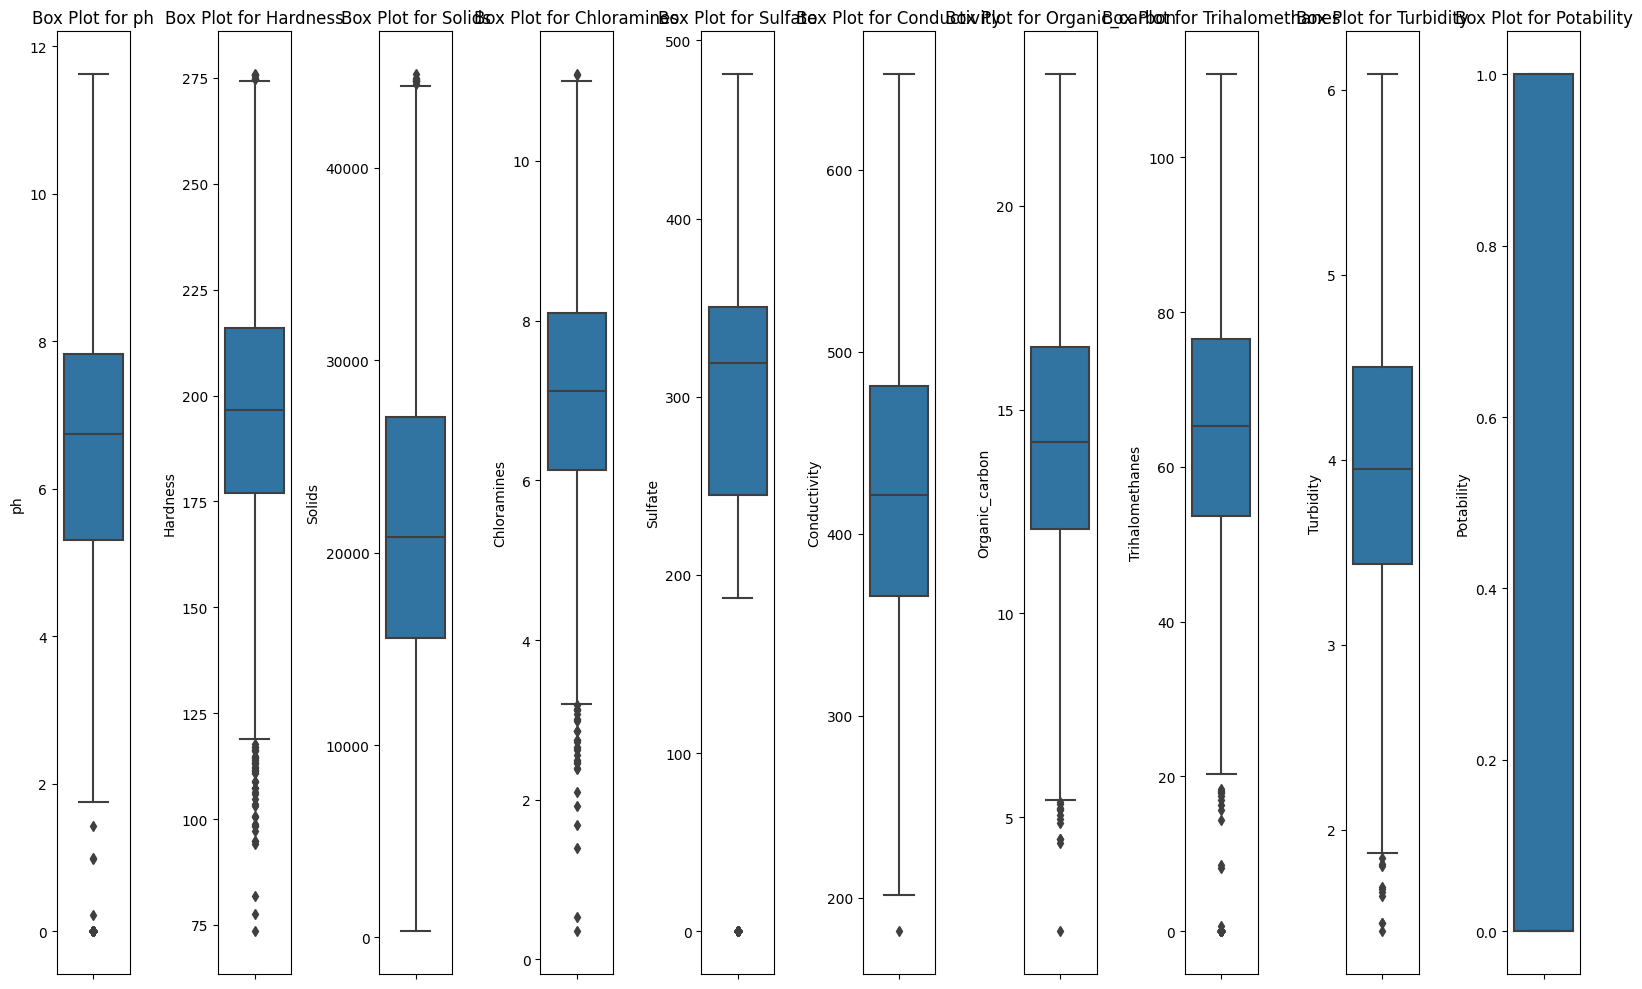

In [37]:
# Create box plots for each column
plt.figure(figsize=(16, 10))  # Adjust the figure size as needed

# Loop through each column and create a box plot
for column in data.columns:
    plt.subplot(1, len(data.columns), data.columns.get_loc(column) + 1)
    sns.boxplot(y=data[column])
    plt.title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()

Normalisasi (Data Scaling)

In [40]:
# Select the columns you want to scale (numerical features)
numerical_columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes','Turbidity']

# Initialize the StandardScaler for z-score scaling
scaler = StandardScaler()

# Fit and transform the selected columns with the StandardScaler
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display the DataFrame after data scaling
print("DataFrame after Data Scaling:")
print(data)


DataFrame after Data Scaling:
            ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0    -2.072372  0.301947 -0.106688     0.140575  0.775449      1.739216   
1    -0.790544 -2.120919 -0.370775    -0.297845 -1.739384      2.097159   
2     0.721348  0.923039 -0.214433     1.443158 -1.739384     -0.085810   
3     0.796421  0.606395  0.043253     0.641072  0.696081     -0.778979   
4     1.063908 -0.461791 -0.450331    -0.356290  0.377047     -0.338772   
...        ...       ...       ...          ...       ...           ...   
3230  0.021287 -0.283368  0.546725     0.435508  0.619747     -0.119871   
3232  0.621222 -0.062032 -0.529655     0.642410 -1.739384     -0.413441   
3233  1.176803 -0.633194  1.404117     0.173555 -1.739384      0.082517   
3234 -0.303941  1.127466 -1.182882    -0.516664 -1.739384     -0.282753   
3235  0.643925 -0.012299 -0.520567     0.278433 -1.739384     -1.227484   

      Organic_carbon  Trihalomethanes  Turbidity  Potability  
0     